<a href="https://colab.research.google.com/github/shofwatunniswah/C5026221043/blob/main/segmentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library

In [1]:
# Import segala macam modul yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi untuk keperluan Plotting PCA
sns.set(style="whitegrid")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Menggunakan path lengkap dari file di Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/MarkCamp.xls'

# Membaca file XLSX
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama data
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [4]:
# Menampilkan informasi umum tentang dataset
print(df.info())


# Menampilkan statistik deskriptif dasar
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single',
    'Divorced' : 'Single',
    'Married' : 'Together'
})

In [6]:
# Encoding Kategori Data
df = pd.get_dummies(df, columns=['Marital_Status', 'Education'])

In [7]:
df.shape

(2240, 34)

In [8]:
df.isnull().any(axis=1).sum()

24

In [9]:
df.isnull().any(axis=0)

ID                         False
Year_Birth                 False
Income                      True
Kidhome                    False
Teenhome                   False
Dt_Customer                False
Recency                    False
MntWines                   False
MntFruits                  False
MntMeatProducts            False
MntFishProducts            False
MntSweetProducts           False
MntGoldProds               False
NumDealsPurchases          False
NumWebPurchases            False
NumCatalogPurchases        False
NumStorePurchases          False
NumWebVisitsMonth          False
AcceptedCmp3               False
AcceptedCmp4               False
AcceptedCmp5               False
AcceptedCmp1               False
AcceptedCmp2               False
Complain                   False
Z_CostContact              False
Z_Revenue                  False
Response                   False
Marital_Status_Single      False
Marital_Status_Together    False
Education_2n Cycle         False
Education_

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Income                   2216 non-null   float64       
 3   Kidhome                  2240 non-null   int64         
 4   Teenhome                 2240 non-null   int64         
 5   Dt_Customer              2240 non-null   datetime64[ns]
 6   Recency                  2240 non-null   int64         
 7   MntWines                 2240 non-null   int64         
 8   MntFruits                2240 non-null   int64         
 9   MntMeatProducts          2240 non-null   int64         
 10  MntFishProducts          2240 non-null   int64         
 11  MntSweetProducts         2240 non-null   int64         
 12  MntGoldProds             2240 non-

In [11]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.

In [12]:
print(df)

         ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0      5524        1957  58138.0        0         0  2012-09-04       58   
1      2174        1954  46344.0        1         1  2014-03-08       38   
2      4141        1965  71613.0        0         0  2013-08-21       26   
3      6182        1984  26646.0        1         0  2014-02-10       26   
4      5324        1981  58293.0        1         0  2014-01-19       94   
...     ...         ...      ...      ...       ...         ...      ...   
2235  10870        1967  61223.0        0         1  2013-06-13       46   
2236   4001        1946  64014.0        2         1  2014-06-10       56   
2237   7270        1981  56981.0        0         0  2014-01-25       91   
2238   8235        1956  69245.0        0         1  2014-01-24        8   
2239   9405        1954  52869.0        1         1  2012-10-15       40   

      MntWines  MntFruits  MntMeatProducts  ...  Z_CostContact  Z_Revenue  \
0         

In [13]:
df = df.dropna()

In [14]:
df.shape

(2216, 34)

In [15]:
def calculate_peopleinhome(row):
    if row['Marital_Status_Together']:
        return 2 + row['Kidhome'] + row['Teenhome']
    elif row['Marital_Status_Single']:
        return 1 + row['Kidhome'] + row['Teenhome']
    else:
        return row['Kidhome'] + row['Teenhome']

df['PeopleInHome'] = df.apply(calculate_peopleinhome, axis=1)

<ipython-input-15-26c069a6c230>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PeopleInHome'] = df.apply(calculate_peopleinhome, axis=1)


In [16]:
def calculatePurchases (row):
  return row['NumWebPurchases'] + row['NumCatalogPurchases'] + row['NumStorePurchases']

df['TotalPurchases'] = df.apply(calculatePurchases, axis=1)
print(df.head())

     ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-09-04       58   
1  2174        1954  46344.0        1         1  2014-03-08       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-02-10       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Response  Marital_Status_Single  \
0       635         88              546  ...         1                   True   
1        11          1                6  ...         0                   True   
2       426         49              127  ...         0                  False   
3        11          4               20  ...         0                  False   
4       173         43              118  ...         0                  False   

   Marital_Status_Together  Education_2n Cycle  Education_Basic  \
0            

In [17]:
df['TotalCampaignAccepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

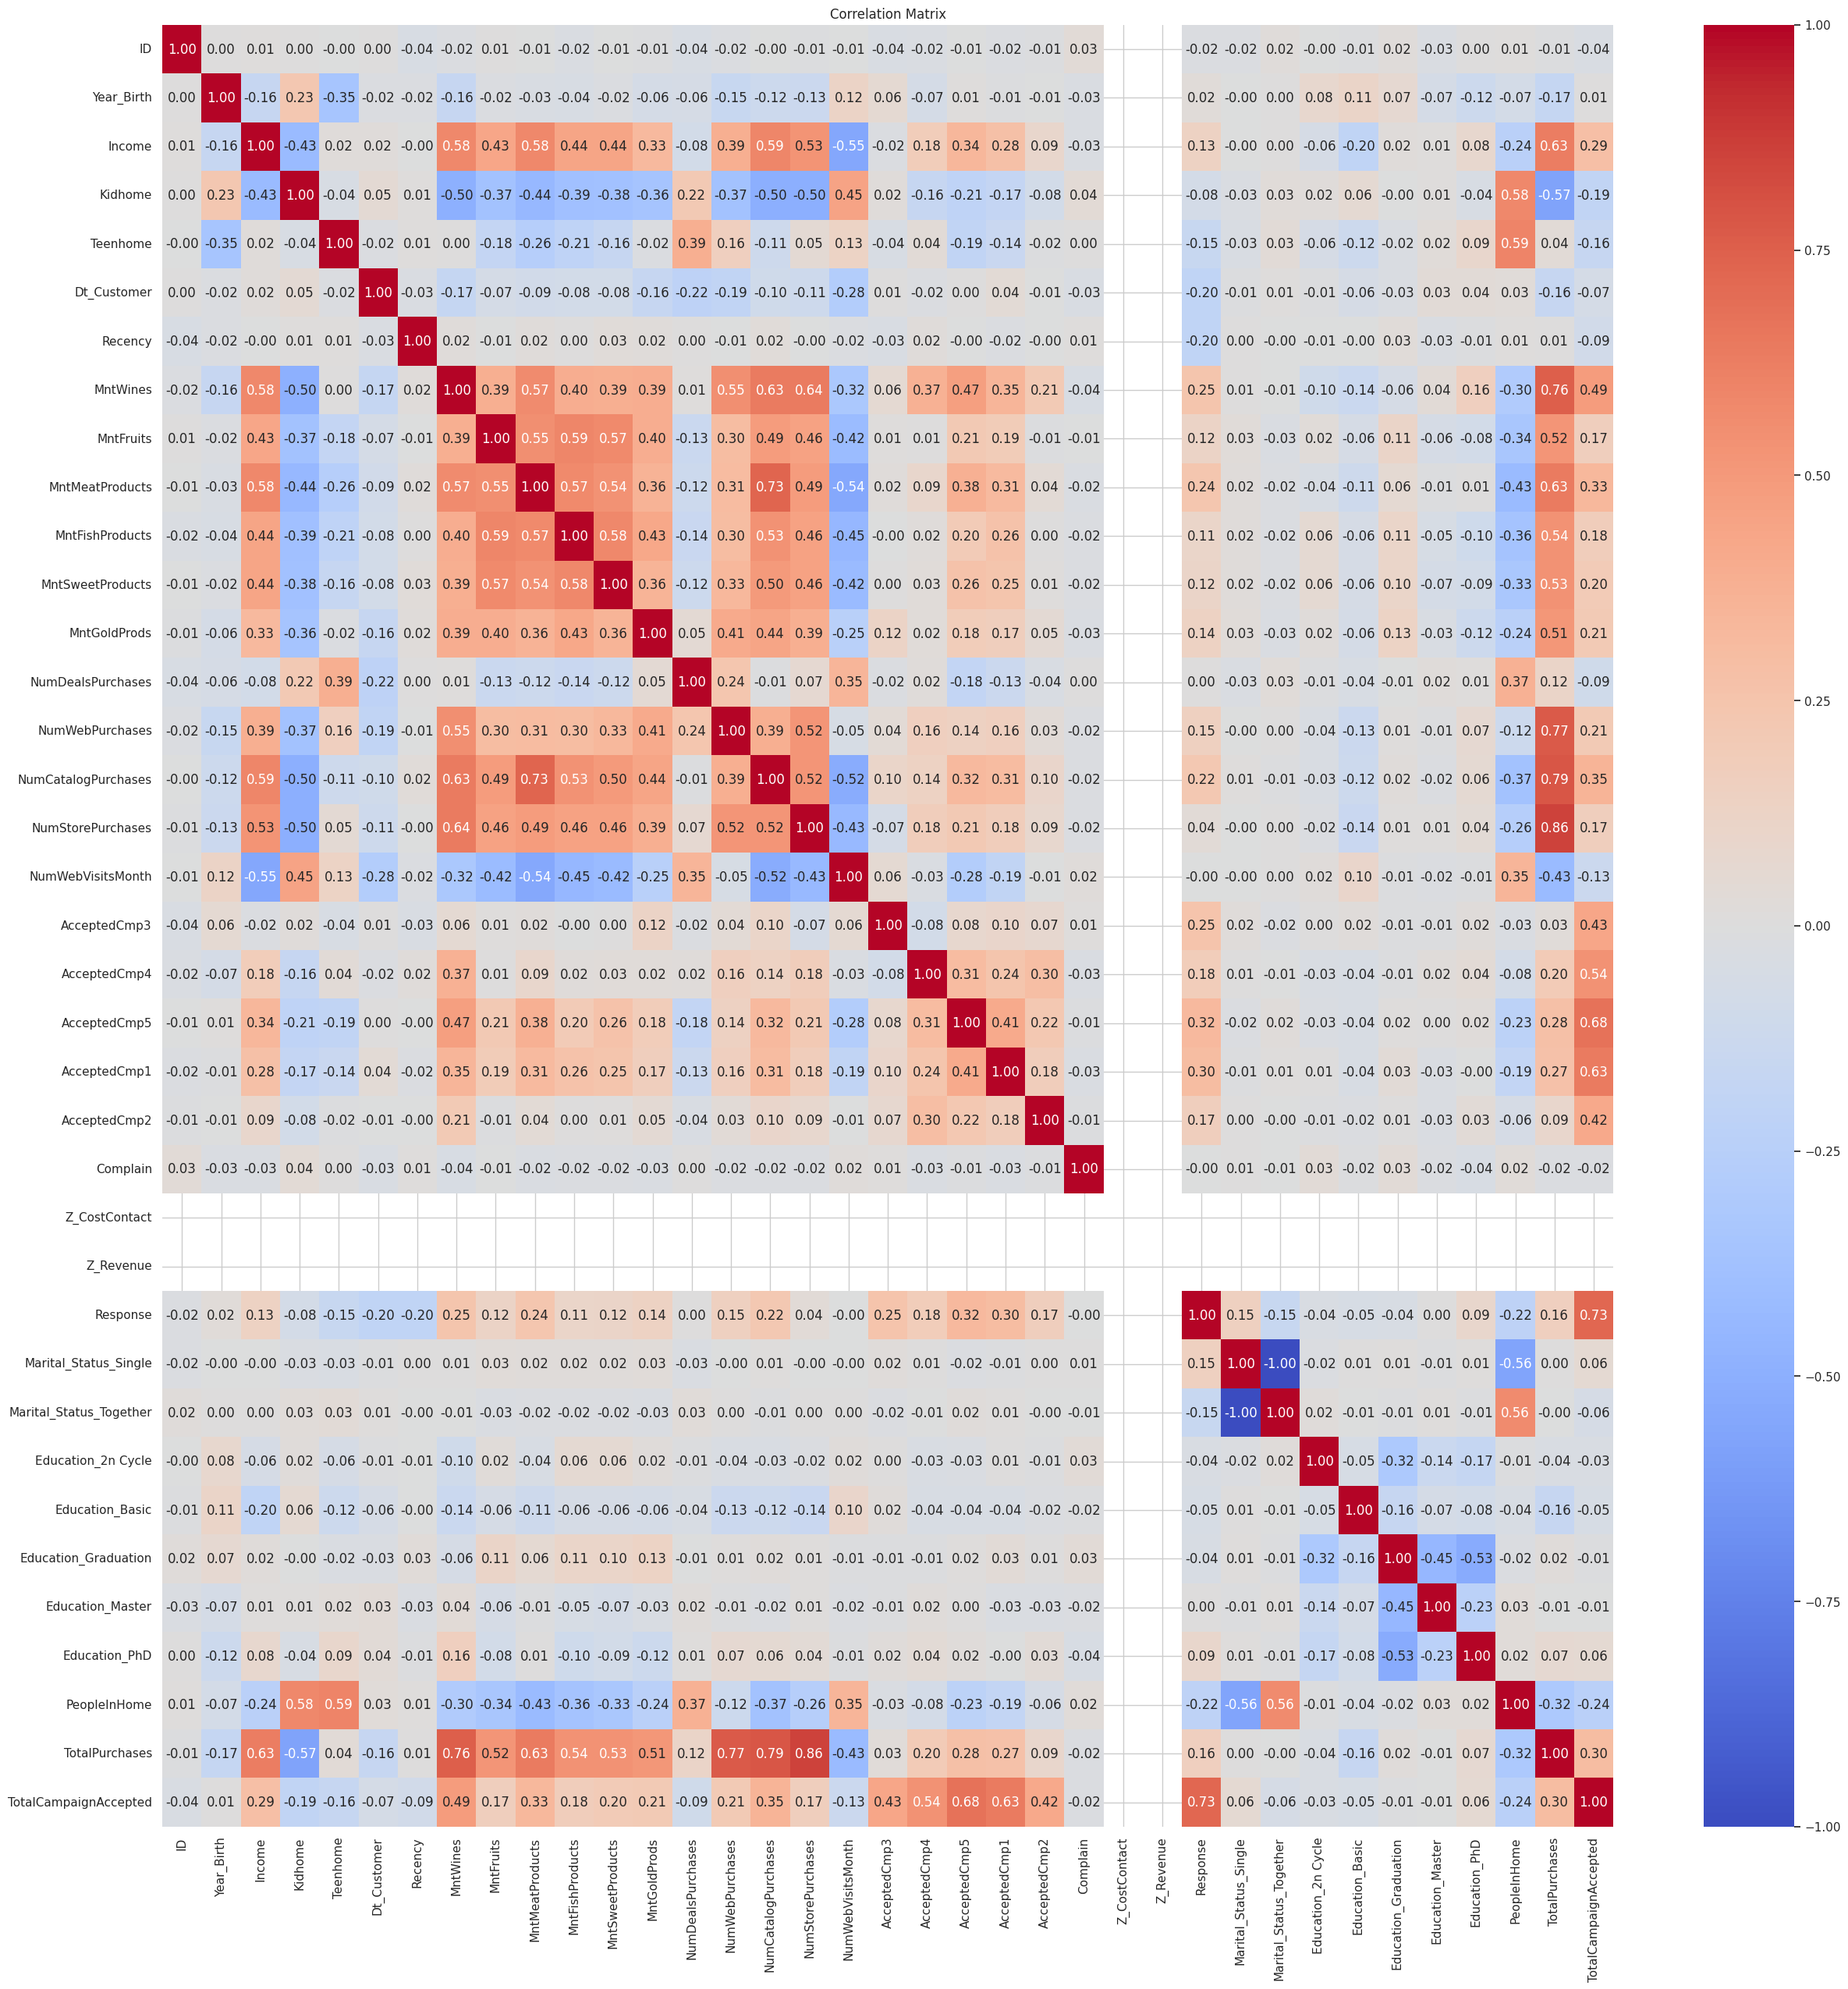

In [18]:
# Melihat korelasi antar variabel numerik
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
df_features = df[['Income', 'PeopleInHome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalPurchases', 'NumDealsPurchases', 'TotalCampaignAccepted']]

In [20]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_features)

In [21]:
df_minmax = pd.DataFrame(data=X, columns=df_features.columns.tolist())

In [22]:
print(df_minmax)

        Income  PeopleInHome  MntWines  MntFruits  MntMeatProducts  \
0     0.084832          0.00  0.425318   0.442211         0.316522   
1     0.067095          0.50  0.007368   0.005025         0.003478   
2     0.105097          0.25  0.285332   0.246231         0.073623   
3     0.037471          0.50  0.007368   0.020101         0.011594   
4     0.085065          0.50  0.115874   0.216080         0.068406   
...        ...           ...       ...        ...              ...   
2211  0.089472          0.50  0.474883   0.216080         0.105507   
2212  0.093669          1.00  0.271936   0.000000         0.017391   
2213  0.083092          0.00  0.608171   0.241206         0.125797   
2214  0.101536          0.50  0.286671   0.150754         0.124058   
2215  0.076908          0.75  0.056263   0.015075         0.035362   

      MntFishProducts  MntSweetProducts  MntGoldProds  TotalPurchases  \
0            0.664093          0.335878      0.274143         0.68750   
1            

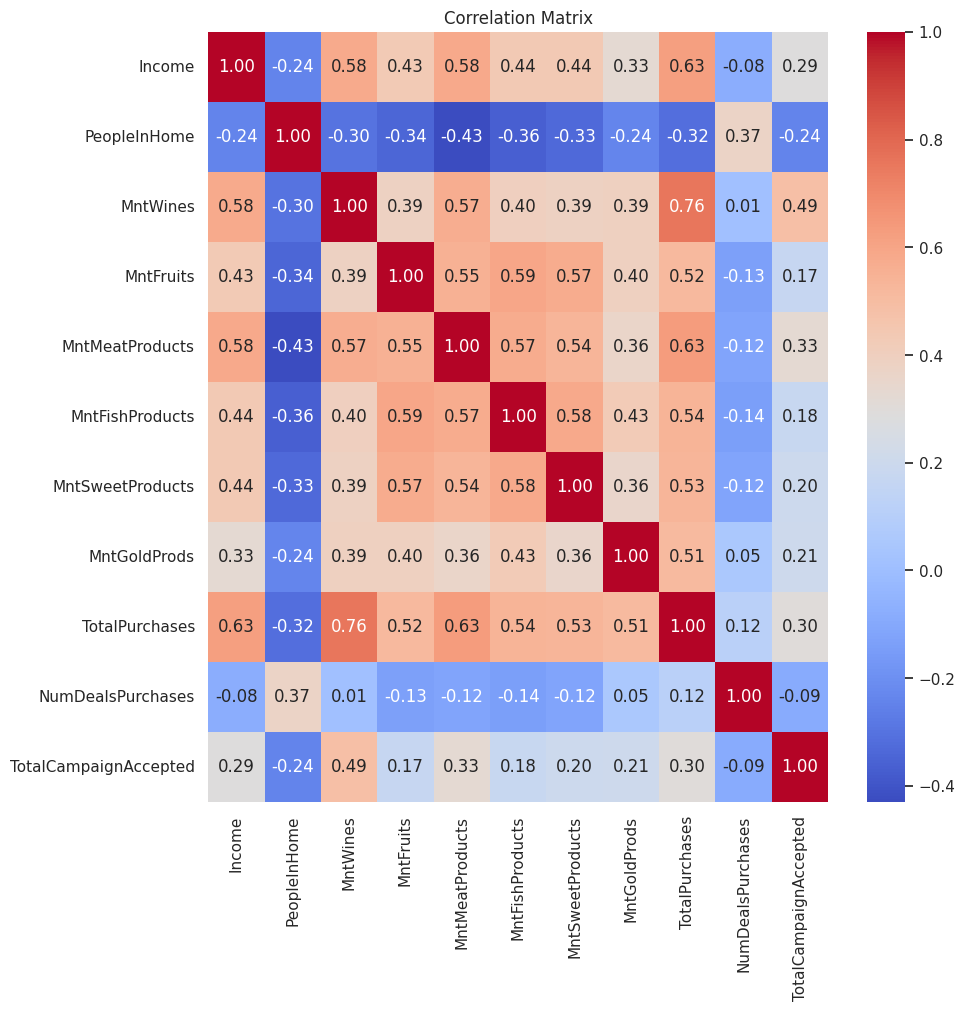

In [23]:
# Melihat korelasi antar variabel numerik
plt.figure(figsize=(10, 10))
sns.heatmap(df_minmax.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

CLUSTERING
cara berapa banyak cluster yang dibuat

In [24]:
!pip install kneed

In [25]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

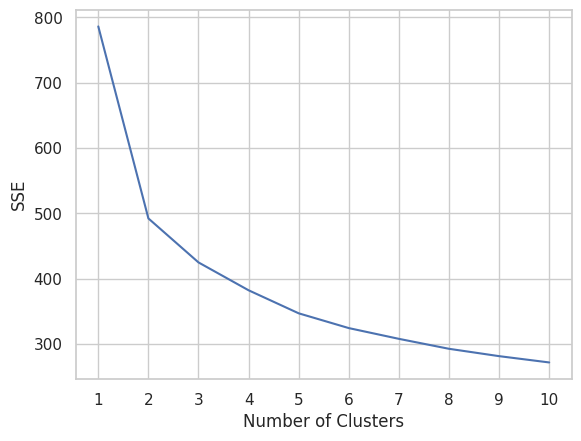

In [27]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

silhouette coefficient

In [29]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

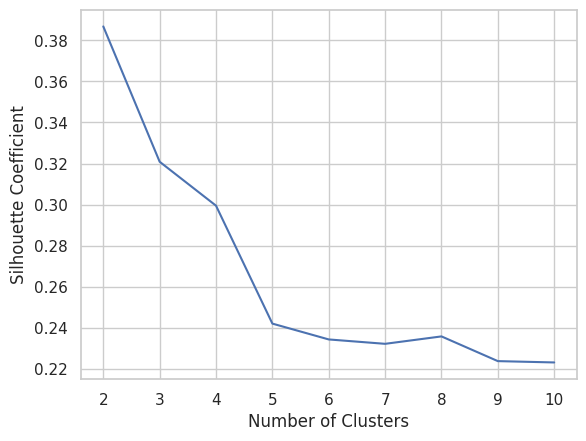

In [30]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The actual clustering

In [31]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [32]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [33]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)

424.9063152344339
[[0.10934255 0.20263158 0.37859344 0.40123777 0.25573028 0.45662264
  0.30736842 0.25429743 0.61171053 0.09403509 0.17431579]
 [0.09336129 0.39922145 0.39017491 0.11800351 0.12697157 0.11697239
  0.09936871 0.20693874 0.58515355 0.2171857  0.13114187]
 [0.05370237 0.47742906 0.04082739 0.02983533 0.01691129 0.03226246
  0.0216471  0.054264   0.20706148 0.14881055 0.03456578]]
7


In [34]:
membership = kmeans.labels_

In [35]:
membership.dtype

dtype('int32')

PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca   = PCA()
x_pca = pca.fit_transform(X)

In [38]:
pca.explained_variance_ratio_

array([0.47882224, 0.13266707, 0.11187864, 0.06448611, 0.05147854,
       0.04790801, 0.03547769, 0.03295511, 0.02290381, 0.01936179,
       0.00206098])

In [39]:
x_pca.shape

(2216, 11)

In [40]:
pc = pd.DataFrame(x_pca[:,:2], columns=['pc1', 'pc2'])

In [41]:
pale_green  = ['#90ee90']
yellow      = ['#ffff66']
magenta     = ['#c20078']

clust_colors = pale_green + yellow + magenta

In [42]:
colors = [clust_colors[m] for m in membership]

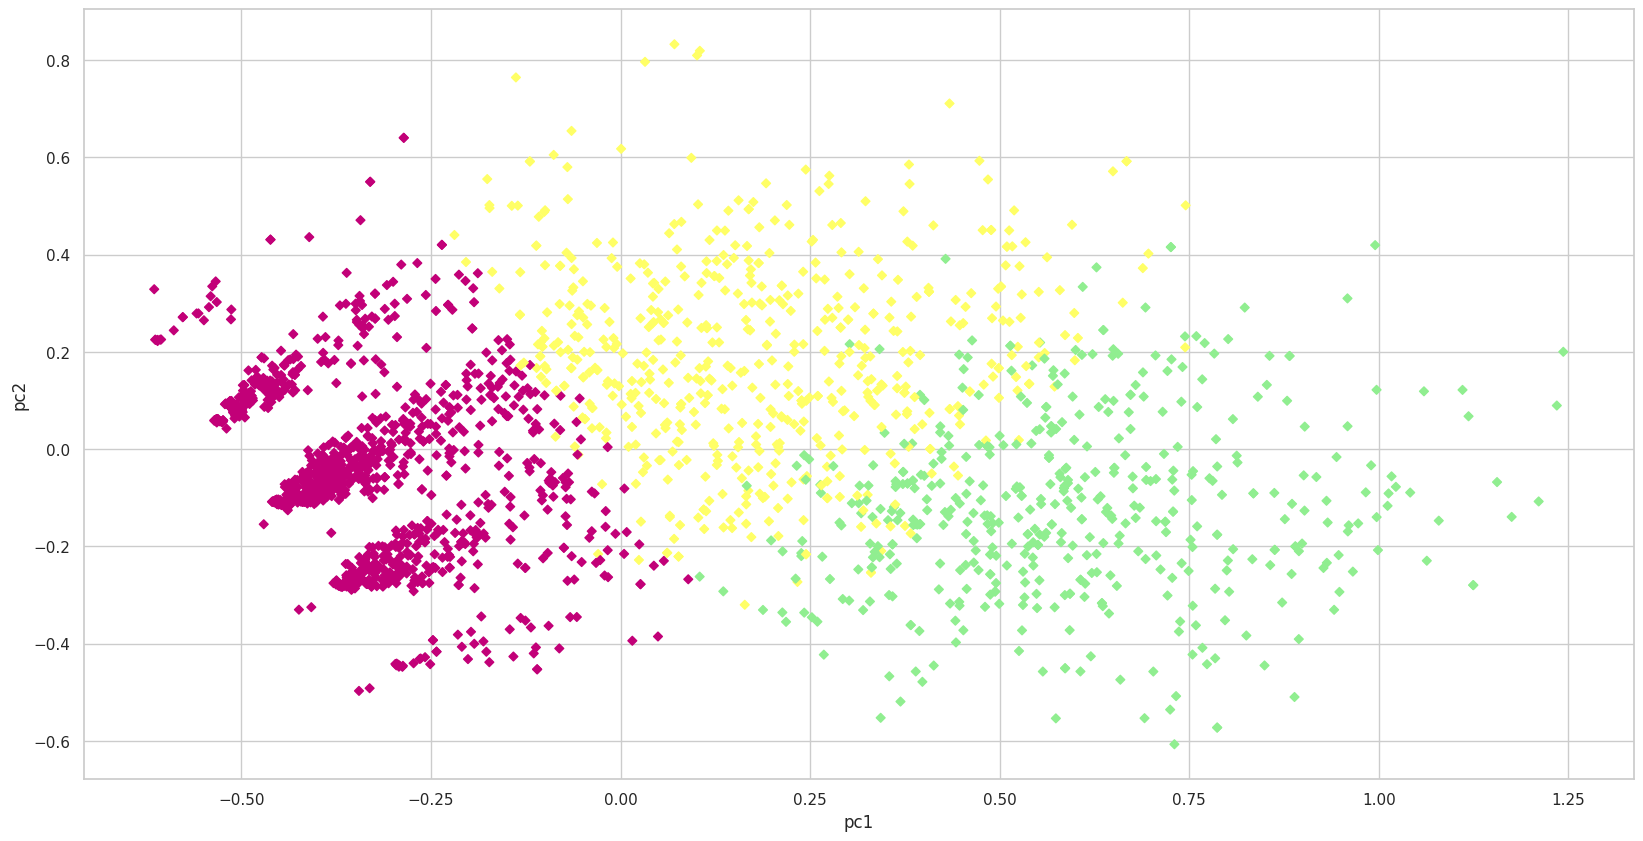

In [44]:
pc.plot.scatter('pc1', 'pc2', c = colors, figsize = (20, 10), marker='D')
plt.show()

In [45]:
pca_features = pd.DataFrame(x_pca, columns=['pc'+str(i) for i in range(1, x_pca.shape[1]+1)])
# pca_features = pd.DataFrame(x_pca, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])
pca_features

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.833259,-0.226210,-0.085636,0.011712,0.033491,-0.114165,0.071049,-0.134083,-0.060811,0.019621,-0.028049
1,-0.433388,-0.074969,-0.001745,0.036243,-0.018221,-0.008581,-0.021906,0.008981,-0.024511,0.018724,0.018435
2,0.313997,-0.111019,-0.094059,-0.103205,-0.049246,-0.132384,-0.106702,-0.081155,0.072739,-0.140463,0.014188
3,-0.385316,-0.065876,-0.024465,0.024767,-0.026308,-0.021745,-0.009942,-0.002142,0.007357,-0.001082,-0.015391
4,-0.058071,0.055857,-0.186804,-0.032512,-0.072213,0.017016,0.099912,-0.134547,-0.016437,-0.025652,0.015174
...,...,...,...,...,...,...,...,...,...,...,...
2211,0.395071,0.193570,-0.208549,-0.109230,0.356238,0.184729,-0.075723,0.418655,-0.196026,0.048450,-0.005748
2212,-0.285924,0.640304,-0.136724,0.126538,-0.047225,-0.024025,0.096816,-0.105561,0.007302,-0.016893,0.019238
2213,0.410424,-0.050061,0.378485,-0.128325,-0.165525,0.043930,-0.126849,-0.070520,-0.076282,-0.061436,-0.012313
2214,0.204176,0.132653,-0.164564,-0.094355,-0.011784,-0.109382,-0.054368,0.014711,0.112348,-0.059386,0.003475


In [46]:
df_minmax = df_minmax.var()

In [47]:
df_minmax

Income                   0.001433
PeopleInHome             0.051271
MntWines                 0.051049
MntFruits                0.039988
MntMeatProducts          0.016905
MntFishProducts          0.044689
MntSweetProducts         0.024575
MntGoldProds             0.026056
TotalPurchases           0.050690
NumDealsPurchases        0.016447
TotalCampaignAccepted    0.031858
dtype: float64

In [49]:
df_minmax_varsum = sum(df_minmax)

In [50]:
-np.sort(-np.array([a/df_minmax_varsum for a in df_minmax]))

array([0.14444064, 0.14381515, 0.14280414, 0.12589875, 0.11265407,
       0.0897507 , 0.07340532, 0.06923246, 0.04762503, 0.04633604,
       0.00403769])

In [51]:
kmeans_pca_all = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [52]:
kmeans_pca_all.fit(pca_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [53]:
# The lowest SSE value
print(kmeans_pca_all.inertia_)

# Final locations of the centroid
print(kmeans_pca_all.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_all.n_iter_)

424.90631523443403
[[ 5.93648084e-01 -1.19238494e-01 -8.92616918e-02  5.79851435e-02
  -1.29549749e-02 -1.61963662e-02  4.77459353e-03  6.03773755e-03
  -2.67620865e-03  8.23218060e-03  2.23362365e-04]
 [ 1.83632360e-01  1.91151643e-01  6.69259865e-02 -9.60638107e-02
   8.54443685e-03  1.22506387e-02  3.64802051e-04 -2.09399311e-03
   1.12960030e-02 -9.29592387e-03  1.57417038e-03]
 [-3.33725146e-01 -4.63003999e-02  3.19525657e-03  2.40601371e-02
   1.04465052e-03  5.26573297e-04 -2.13137361e-03 -1.42527715e-03
  -4.52097214e-03  1.25774567e-03 -8.73574895e-04]]
7


In [54]:
kmeans_pca_first = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [55]:
kmeans_pca_first.fit(pca_features.pc1.values.reshape(-1, 1))

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [56]:
# The lowest SSE value
print(kmeans_pca_first.inertia_)

# Final locations of the centroid
print(kmeans_pca_first.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first.n_iter_)

41.28055497004375
[[ 0.59780979]
 [-0.35220038]
 [ 0.10658273]]
15


In [57]:
kmeans_pca_first2 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [58]:
kmeans_pca_first2.fit(pca_features[['pc1', 'pc2']])

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [59]:
# The lowest SSE value
print(kmeans_pca_first2.inertia_)

# Final locations of the centroid
print(kmeans_pca_first2.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first2.n_iter_)

127.88225002783344
[[ 0.57603482 -0.0948964 ]
 [-0.33907671 -0.05887377]
 [ 0.11696315  0.21629235]]
19


In [60]:
kmeans_pca_first3 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [61]:
kmeans_pca_first3.fit(pca_features[['pc1', 'pc2', 'pc3']])

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [62]:
# The lowest SSE value
print(kmeans_pca_first3.inertia_)

# Final locations of the centroid
print(kmeans_pca_first3.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first3.n_iter_)

213.24247831908565
[[ 0.57577455 -0.11893705 -0.10351418]
 [-0.32759368 -0.04572504  0.0020551 ]
 [ 0.19303336  0.2131341   0.09211869]]
36


In [63]:
from sklearn.metrics import v_measure_score

In [64]:
v_measure_score(kmeans.labels_, kmeans_pca_all.labels_)

1.0

In [65]:
v_measure_score(kmeans.labels_, kmeans_pca_first.labels_)

0.6518462467250382

In [66]:
v_measure_score(kmeans.labels_, kmeans_pca_first2.labels_)

0.7794171966012491

In [67]:
v_measure_score(kmeans.labels_, kmeans_pca_first3.labels_)

0.8372755937747758